# Making Business decisions based on data project

This project is for a big online store.

The project included a list of hypotheses that may help boost the company's revenue.

On the first part of the project I prioritized the list of hypotheses by applying ICE and RICE frameworks.

On the second part of the project I analyzed the results of the A/B test performed. 

In my analysis I used two datasets: Orders_US and Visits_US.

My analysis included the following metrics for both groups:
1. Cumulative revenue
2. Cumulative avergae check & the relative difference between the groups
3. Daily conversion rate
4. Number of orders per user
5. 95th and 99th percentile for the number of orders per user and the orders prices
6. Statistical significance of the conversion rate and and average check (with raw data and with filtered data)

And finally I presented my conclusions regarding the performed A/B test.


## Part 1: Prioritizing Hypotheses

In [1]:
!pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 50 kB/s eta 0:00:011


In [2]:
#import libraries
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [3]:
#download the datasets
try:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
except:
    print('An error has occured with "hypotheses_us" file reading')

In [4]:
#looking at the data table 
pd.set_option("display.max_colwidth", 450)
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


We have 9 hypotheses with a reach, impact, confidence and effort score for each one. 
We will calculate the ICE and RICE frameworks to prioritize these hypotheses.

ICE and RICE are popular frameworks used to prioritize problems. 

Reach — how many users will be affected by the update you want to introduce (Only used in RICE)

Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product

Confidence — how sure you are that your product will affect them in this way

Effort — how much will it cost to test the hypothesis

In [6]:
#calculating ICE
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
pd.set_option("display.max_colwidth", 450)
display(hypotheses.sort_values(by = 'ICE', ascending = False).round(2))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


We can learn that according to the ICE method hypotheses number 8 is ranked in the highest priority for us.

In [7]:
#calculating RICE
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
pd.set_option("display.max_colwidth", 450)
display(hypotheses.sort_values(by = 'RICE', ascending = False).round(2))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


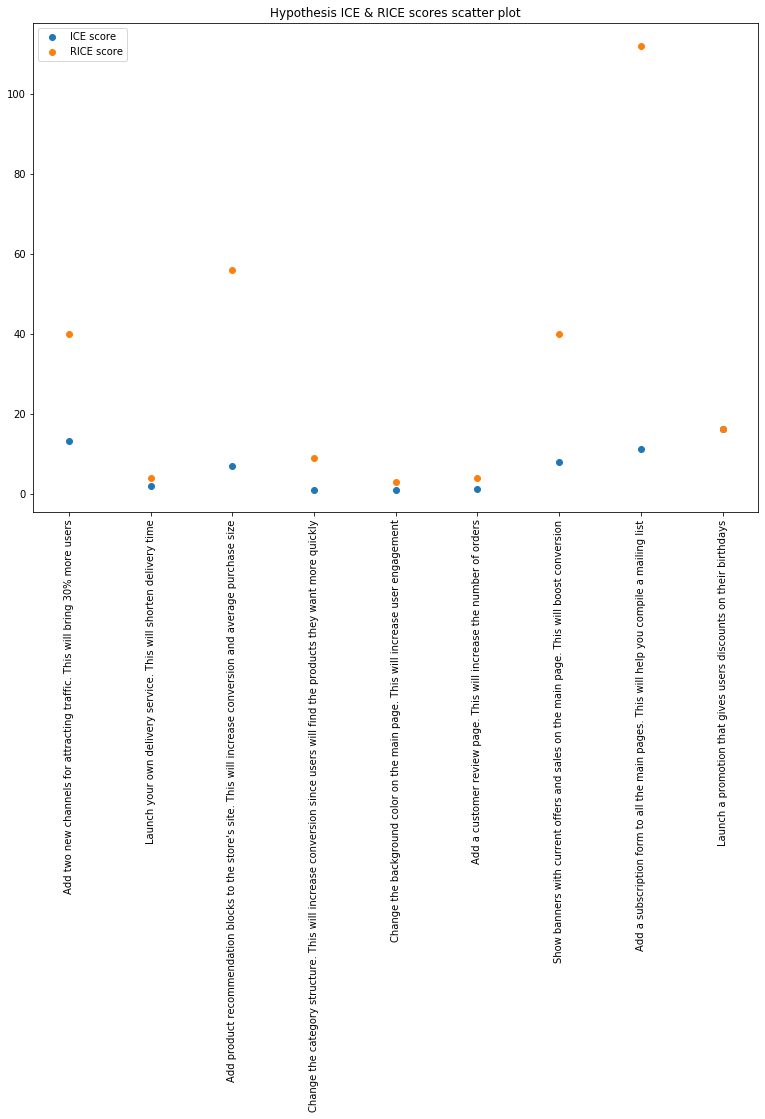

In [8]:
plt.figure(figsize = (13,9))
plt.scatter(hypotheses['Hypothesis'],hypotheses['ICE'], label = 'ICE score')
plt.scatter(hypotheses['Hypothesis'],hypotheses['RICE'], label = 'RICE score')
plt.title('Hypothesis ICE & RICE scores scatter plot' )
plt.legend(loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()

According to the RICE method when we take into consideration the Reach factor, hypotheses number 7 gets the highest priority while hypotheses number 8 is legging in the 5th place. This happens because the Reach factor for hypotheses number 7 is much higher than for hypotheses number 8 (10 vs 1) and we ignored this when we calculated ICE previously. 
We may have higher confidence in number 8 and the impact might be greater with the same effort but we will reach less users with this hypotheses.

## Part 2: A/B Test Analysis

In [9]:
#download the datasets
try:
    visits = pd.read_csv('/datasets/visits_us.csv', sep = ',')
except:
    print('An error has occured with "visits_us" file reading')

In [10]:
#download the datasets
try:
    orders = pd.read_csv('/datasets/orders_us.csv', sep = ',')
except:
    print('An error has occured with "orders_us" file reading')

In [11]:
#looking at the visits data
display(visits.head(10))

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


The visits data set includes the date of the visit, the visit group (A/B) and the number of visits on this day.

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


The visits dataset includes 62 rows. The date data type is object, we will change it to datetime type.

In [13]:
visits.describe(include = 'all')

,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-01,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000


This dataset includes 62 rows , with 31 dates (for each group). We can see we have equal amount of dates for A and B groups. The number of visits per day vary between 361 - 770, with a mean of 607 and std of 114. 

In [14]:
#Looking for missing values in the visits dataset
visits.stb.missing(style = True)

,missing,total,percent
date,0,62,0.00%
group,0,62,0.00%
visits,0,62,0.00%


There are no missing values in the missing dataset.

In [15]:
#looking at the orders data
display(orders.head(10))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


The orders dataset includes each order transaction ID , the visitor ID, the date of the order, the revnue for this order and the group this visitor belongs to.

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


The orders data set includes 1197 rows. The date type is object, we will change it to datetime type.

In [17]:
orders.describe(include = 'all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN
50%,2.145194e+09,2.217985e+09,NaN,50.200000,NaN
75%,3.237740e+09,3.177606e+09,NaN,130.400000,NaN


We have 31 unique dates, as expected from the visits table, group B made more orders (640). 
The revenue from each order varies from 5 to 19920 USD, very large range. 

In [18]:
#Looking for missing values in the orders dataset
orders.stb.missing(style = True)

,missing,total,percent
transactionId,0,"1,197",0.00%
visitorId,0,"1,197",0.00%
date,0,"1,197",0.00%
revenue,0,"1,197",0.00%
group,0,"1,197",0.00%


We don't have any missing data in the orders dataset

In [19]:
# checking to see if we have users that were accidently assigned to both groups
duplicates = orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')
duplicates.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [20]:
#checking how many users we have that were assigend to both groups
duplicates['visitorId'].count()

58

we have 58 buyers that were assigned to both groups. We will remove these users from the test analysis since their results may distort our analysis. 

In [21]:
#making a list of visitor IDs from the duplicates table
dup_list = list(duplicates['visitorId'])

In [22]:
orders_new = orders.query('visitorId not in @dup_list')
orders_new.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


Now we have a table for orders that include only users that were assigned either to group A or group B.

In [23]:
#before we starts with the analysis I will change the date data type 
orders_new['date'] = pd.to_datetime(orders_new['date'])
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
visits['date'] = pd.to_datetime(visits['date'])

In [25]:
#looking for duplicates in visits dataset
visits_d = visits[visits.duplicated()]
display(visits_d)

,date,group,visits


In [26]:
#looking for duplicates in orders dataset
orders_d = orders[orders.duplicated()]
display(orders_d)

,transactionId,visitorId,date,revenue,group


There are no duplicated row in our datasets. 

**Graph cumulative revenue by group. Make conclusions and conjectures.**

In [27]:
#creating a table for each test group
orders_A = orders_new[orders_new['group'] =='A'].reset_index()
orders_B = orders_new[orders_new['group'] =='B'].reset_index()

In [28]:
#calculating the revenue per day for group A
orders_A_daily = orders_A.groupby('date').agg({'revenue':'sum'}).reset_index()
orders_A_daily.head()

,date,revenue
0,2019-08-01,2266.6
1,2019-08-02,1468.3
2,2019-08-03,1815.2
3,2019-08-04,675.5
4,2019-08-05,1398.0


In [29]:
#calculating the cumulative revenue for group A
orders_A_daily['cum_revenue'] = orders_A_daily['revenue'].cumsum()
orders_A_daily.head()

,date,revenue,cum_revenue
0,2019-08-01,2266.6,2266.6
1,2019-08-02,1468.3,3734.9
2,2019-08-03,1815.2,5550.1
3,2019-08-04,675.5,6225.6
4,2019-08-05,1398.0,7623.6


In [30]:
#calculating the revenue per day for group B
orders_B_daily = orders_B.groupby('date').agg({'revenue':'sum'}).reset_index()
orders_B_daily.head()

,date,revenue
0,2019-08-01,967.2
1,2019-08-02,2568.1
2,2019-08-03,1071.6
3,2019-08-04,1531.6
4,2019-08-05,1449.3


In [31]:
#calculating the cumulative revenue for group B
orders_B_daily['cum_revenue'] = orders_B_daily['revenue'].cumsum()
orders_B_daily.head()

,date,revenue,cum_revenue
0,2019-08-01,967.2,967.2
1,2019-08-02,2568.1,3535.3
2,2019-08-03,1071.6,4606.9
3,2019-08-04,1531.6,6138.5
4,2019-08-05,1449.3,7587.8


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

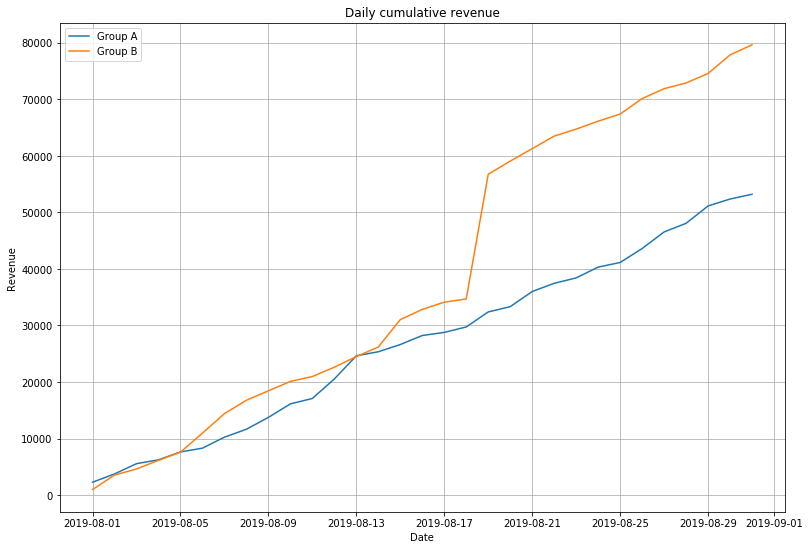

In [32]:
#plotting the cumulative revenue for both groups
plt.figure(figsize=(13,9))
plt.plot(orders_A_daily['date'], orders_A_daily['cum_revenue'], label = 'Group A')
plt.plot(orders_B_daily['date'], orders_B_daily['cum_revenue'], label = 'Group B')
plt.title('Daily cumulative revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


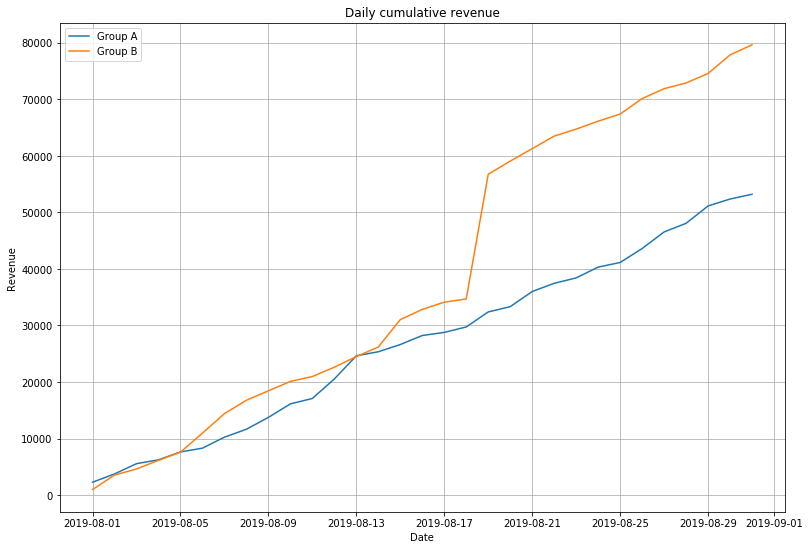

In [91]:
#plotting the cumulative revenue for both groups
plt.figure(figsize=(13,9))
plt.plot(orders_A_daily[['date']], orders_A_daily[['cum_revenue']], label = 'Group A')
plt.plot(orders_B_daily[['date']], orders_B_daily[['cum_revenue']], label = 'Group B')
plt.title('Daily cumulative revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()

It looks like in the first half of the month there was no difference between the groups and only after August 20th we can see a clear difference with group B having a higher cumulative revenue. overall both groups are showing a positive slope in the cumulative revenue throughout the month. 

**Graph cumulative average order size by group. Make conclusions and conjectures.**

In [33]:
#calculating the average check
#we'll start be aggregating the data by date and counting the number of buyers a day
avg_chk_A = orders_A.groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
avg_chk_A.columns = ['date', 'revenue', 'orders']
avg_chk_A['avg_check'] = avg_chk_A['revenue'] / avg_chk_A['orders']
avg_chk_A.head()

,date,revenue,orders,avg_check
0,2019-08-01,2266.6,23,98.547826
1,2019-08-02,1468.3,19,77.278947
2,2019-08-03,1815.2,24,75.633333
3,2019-08-04,675.5,11,61.409091
4,2019-08-05,1398.0,22,63.545455


In [34]:
#calculating cumulative revenue and cumulative orders
avg_chk_A['cum_rev'] = avg_chk_A['revenue'].cumsum()
avg_chk_A['cum_orders'] = avg_chk_A['orders'].cumsum()

In [35]:
#calculating cumulative average check
avg_chk_A['cum_avg_check'] = avg_chk_A['cum_rev'] / avg_chk_A['cum_orders']
avg_chk_A.head()

,date,revenue,orders,avg_check,cum_rev,cum_orders,cum_avg_check
0,2019-08-01,2266.6,23,98.547826,2266.6,23,98.547826
1,2019-08-02,1468.3,19,77.278947,3734.9,42,88.926190
2,2019-08-03,1815.2,24,75.633333,5550.1,66,84.092424
3,2019-08-04,675.5,11,61.409091,6225.6,77,80.851948
4,2019-08-05,1398.0,22,63.545455,7623.6,99,77.006061


In [36]:
#doing the same for group B
avg_chk_B = orders_B.groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
avg_chk_B.columns = ['date', 'revenue', 'orders']
avg_chk_B['avg_check'] = avg_chk_B['revenue'] / avg_chk_B['orders']
avg_chk_B['cum_rev'] = avg_chk_B['revenue'].cumsum()
avg_chk_B['cum_orders'] = avg_chk_B['orders'].cumsum()
avg_chk_B['cum_avg_check'] = avg_chk_B['cum_rev'] / avg_chk_B['cum_orders']
avg_chk_B.head()

,date,revenue,orders,avg_check,cum_rev,cum_orders,cum_avg_check
0,2019-08-01,967.2,17,56.894118,967.2,17,56.894118
1,2019-08-02,2568.1,23,111.656522,3535.3,40,88.382500
2,2019-08-03,1071.6,14,76.542857,4606.9,54,85.312963
3,2019-08-04,1531.6,14,109.400000,6138.5,68,90.272059
4,2019-08-05,1449.3,21,69.014286,7587.8,89,85.256180


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

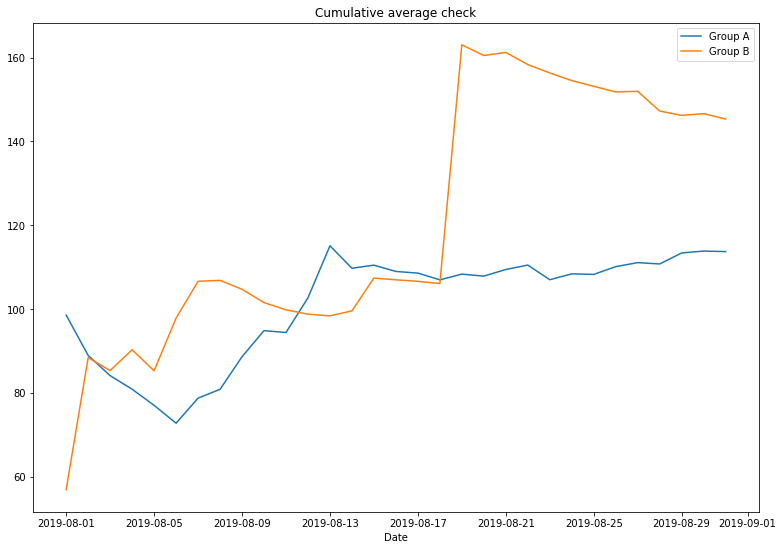

In [37]:
#plotting the cumulative average check for both groups
plt.figure(figsize=(13,9))
plt.plot(avg_chk_A['date'], avg_chk_A['cum_avg_check'], label = 'Group A')
plt.plot(avg_chk_B['date'], avg_chk_B['cum_avg_check'], label = 'Group B')
plt.title('Cumulative average check')
plt.xlabel('Date')
plt.legend()
plt.show()

The average check is acting similar to the cumulative revenue around the August 20th date, we see that in the first half of the month both groups act pretty similar and around August 20th we see a change and group B shows higher cumumlative avergae check values. 
Something happend around this date that we need to investigate in order to know which part of the month is more relevant for our A/B testing analysis. 

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


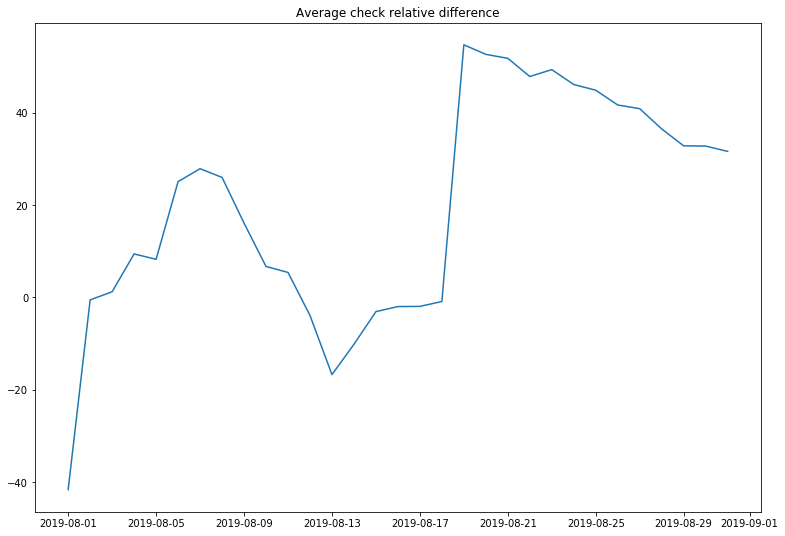

In [38]:
relative_dif = avg_chk_B['cum_avg_check'] - avg_chk_A['cum_avg_check']
plt.figure(figsize=(13,9))
plt.plot(avg_chk_A['date'],relative_dif)
plt.title('Average check relative difference')
plt.show()

We can see that at the first half of the month the relative difference in cumulative average check changed between -40 to 30 and somewhere around the 20th day of the month there was a sharp change and the relative difference was  greater then before but then it started descreasing again until the end of the month. It looks like most of the month group B's avergae order check is higher than group A, but it changes throughout the month but it's not stable. 

In [39]:
#looking for the specific date of the change in behaviour
display(avg_chk_B[avg_chk_B['date'] > '2019-08-15'])

,date,revenue,orders,avg_check,cum_rev,cum_orders,cum_avg_check
15,2019-08-16,1807.0,18,100.388889,32840.2,307,106.971336
16,2019-08-17,1276.0,13,98.153846,34116.2,320,106.613125
17,2019-08-18,568.5,7,81.214286,34684.7,327,106.069419
18,2019-08-19,22064.9,21,1050.709524,56749.6,348,163.073563
19,2019-08-20,2324.6,20,116.230000,59074.2,368,160.527717
20,2019-08-21,2200.2,12,183.350000,61274.4,380,161.248421
21,2019-08-22,2229.5,21,106.166667,63503.9,401,158.363840
22,2019-08-23,1228.9,13,94.530769,64732.8,414,156.359420
23,2019-08-24,1405.7,14,100.407143,66138.5,428,154.529206
24,2019-08-25,1255.3,12,104.608333,67393.8,440,153.167727


We can see that on August 19th there was a significant increase in cumulative revenue (~20,000 USD change which is 10 times more than the month before) while the number of orders was relavtively the same, this might have been cause due to a specific order, we will examine more.
Also, we can see that the drop we saw towards the end of the month was due to a higher number of orders while the revenue per day did not increase by much, giving us a decrease in the average check.

In [40]:
#looking into the orders of group B on August 19th
display(orders_B[orders_B['date'] == '2019-08-19'])

,index,transactionId,visitorId,date,revenue,group
138,315,1939633950,157579733,2019-08-19,40.8,B
139,319,2414788465,2247745159,2019-08-19,25.1,B
140,320,1652782757,2763027084,2019-08-19,25.5,B
141,322,3154167297,2091902649,2019-08-19,5.8,B
156,363,2096847394,4251115836,2019-08-19,40.5,B
157,367,1033377712,3860669668,2019-08-19,65.4,B
158,368,3268879337,2536252163,2019-08-19,310.1,B
185,423,4161654914,990904712,2019-08-19,175.1,B
186,424,2609443403,2406916810,2019-08-19,10.2,B
187,425,590470918,1920142716,2019-08-19,19920.4,B


This day seems pretty normal except for one specific user who in one purchase paid 19,920 USD which is extremly high, but this one specific purchase can't teach us about the test we are trying to do. let's remove this purchase and calculate the average check again.

In [41]:
#removing the out of range order from group B
orders_B_clean = orders_B[orders_B['transactionId'] != 590470918]

In [42]:
#calculating cumulative average check for group B with the filtered data
avg_chk_Bclean = orders_B_clean.groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
avg_chk_Bclean.columns = ['date', 'revenue', 'orders']
avg_chk_Bclean['avg_check'] = avg_chk_Bclean['revenue'] / avg_chk_Bclean['orders']
avg_chk_Bclean['cum_rev'] = avg_chk_Bclean['revenue'].cumsum()
avg_chk_Bclean['cum_orders'] = avg_chk_Bclean['orders'].cumsum()
avg_chk_Bclean['cum_avg_check'] = avg_chk_Bclean['cum_rev'] / avg_chk_Bclean['cum_orders']
avg_chk_Bclean.head()

,date,revenue,orders,avg_check,cum_rev,cum_orders,cum_avg_check
0,2019-08-01,967.2,17,56.894118,967.2,17,56.894118
1,2019-08-02,2568.1,23,111.656522,3535.3,40,88.382500
2,2019-08-03,1071.6,14,76.542857,4606.9,54,85.312963
3,2019-08-04,1531.6,14,109.400000,6138.5,68,90.272059
4,2019-08-05,1449.3,21,69.014286,7587.8,89,85.256180


/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

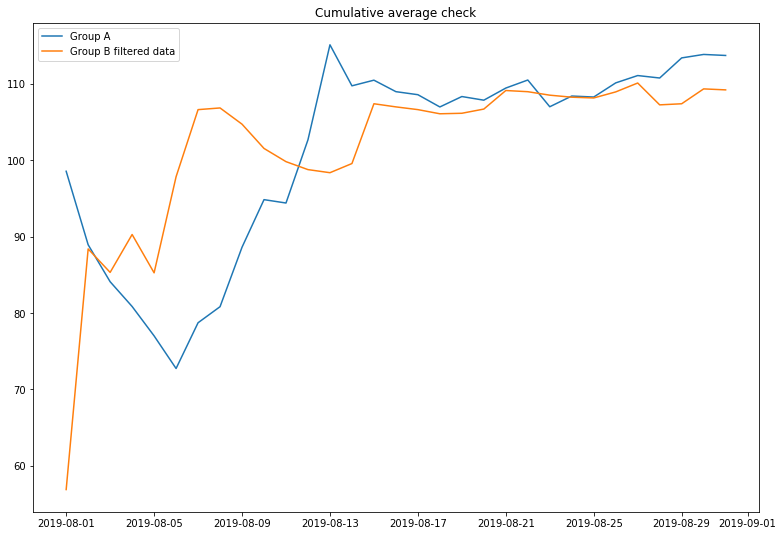

In [43]:
#plotting the cumulative average check for both groups with group B filtered data
plt.figure(figsize=(13,9))
plt.plot(avg_chk_A['date'], avg_chk_A['cum_avg_check'], label = 'Group A')
plt.plot(avg_chk_Bclean['date'], avg_chk_Bclean['cum_avg_check'], label = 'Group B filtered data')
plt.title('Cumulative average check')
plt.legend()
plt.show()

After filtering the data for group B (only removing 1 specific order) we can see that the groups' average check is pretty similar. 
We will check for anomalies in the data later on an perform a more accurate filtering of the data..

**Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

In [44]:
#spliting the visits data to the 2 groups
visits_A = visits[visits['group'] == 'A']
visits_B = visits[visits['group']=='B']

In [45]:
#creating a table with number of orders per day for each group
orders_A_count = orders_A.groupby('date').agg({'transactionId':'count'}).reset_index()
orders_B_count = orders_B.groupby('date').agg({'transactionId':'count'}).reset_index()

In [46]:
#merging the visits and orders tables
orders_visits_A = visits_A.merge(orders_A_count, on = 'date')
orders_visits_A.columns = ['date', 'group', 'visits', 'orders']
orders_visits_B = visits_B.merge(orders_B_count, on = 'date')
orders_visits_B.columns = ['date', 'group', 'visits', 'orders']

In [47]:
#calculating the conversion rate for each group
orders_visits_A['conversion'] = orders_visits_A['orders'] / orders_visits_A['visits']
orders_visits_B['conversion'] = orders_visits_B['orders'] / orders_visits_B['visits']

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

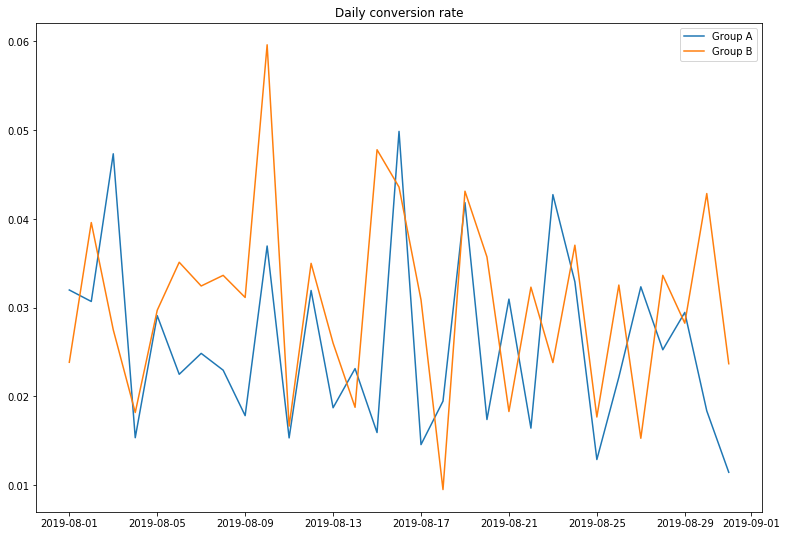

In [48]:
#plotting the daily conversion rate for both groups
plt.figure(figsize=(13,9))
plt.plot(orders_visits_A['date'], orders_visits_A['conversion'], label = 'Group A')
plt.plot(orders_visits_B['date'], orders_visits_B['conversion'], label = 'Group B')
plt.title('Daily conversion rate')
plt.legend()
plt.show()

From the conversion rate plot we can see the both groups act in a similar way, no distinct difference. There are some days when Group B has a higher conversion rate and some days it's the other way around.

**Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

In [49]:
#creating a table of number of orders per user for both groups
orders_user_A = orders_A.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
orders_user_A.columns = ['visitorId', 'orders']
orders_user_B = orders_B.groupby('visitorId').agg({'transactionId':'count'}).reset_index()
orders_user_B.columns = ['visitorId', 'orders']

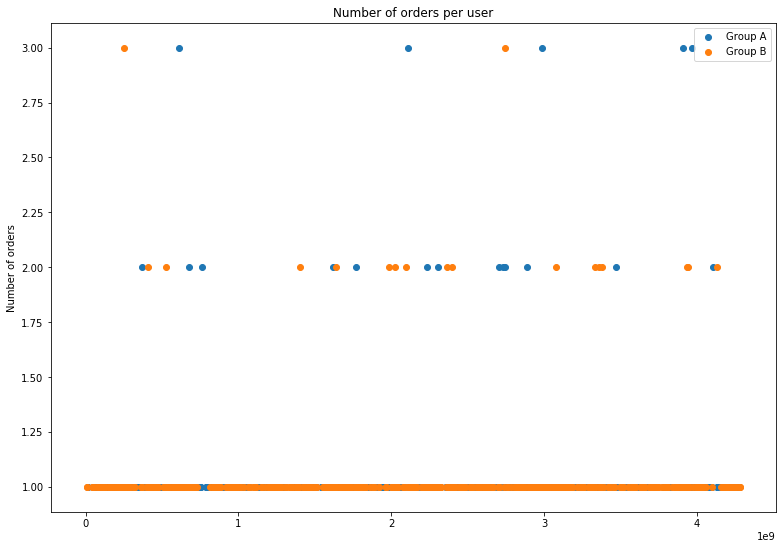

In [50]:
#generating a scatter plot
plt.figure(figsize = (13,9))
plt.scatter(orders_user_A['visitorId'], orders_user_A['orders'], label = 'Group A')
plt.scatter(orders_user_B['visitorId'], orders_user_B['orders'], label = 'Group B')
plt.title('Number of orders per user')
plt.ylabel('Number of orders')
plt.legend()
plt.show()

We can see that most of the users for both groups made only 1 order during August, there are a few users who made 2 orders per month and even less who made three orders. There's no visible difference between the groups.

**Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [51]:
#calculating the 95th and 99th perecentile for the number of orders per user for group A
print(np.percentile(orders_user_A['orders'], [95,99]))

[1.   2.56]


For group A not more than 5% of users placed more than 1 order and not more than 1% place more than 2 orders.

In [52]:
#calculating the 95th and 99th perecentile for the number of orders per user for group B
print(np.percentile(orders_user_B['orders'], [95,99]))

[1. 2.]


Same for group B, not more than 5% of users placed more than 1 order and not more than 1% place more than 2 orders.

**Plot a scatter chart of order prices. Make conclusions and conjectures.**

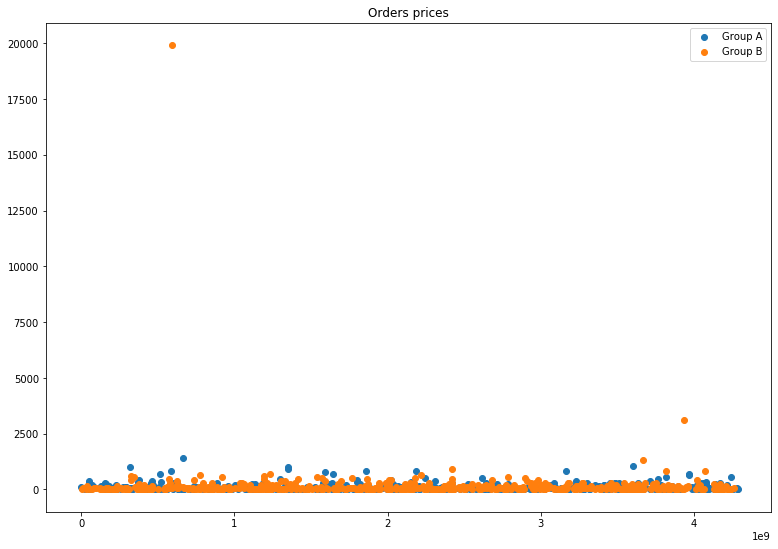

In [53]:
#creating a scatter plot for the orders prices for both groups
plt.figure(figsize = (13, 9))
plt.scatter(orders_A['transactionId'], orders_A['revenue'], label = 'Group A')
plt.scatter(orders_B['transactionId'], orders_B['revenue'], label = 'Group B')
plt.title('Orders prices')
plt.legend()
plt.show()

We can spot the one order with the extreme revenue we already discussed before, I will use the clean data to see the other orders better.

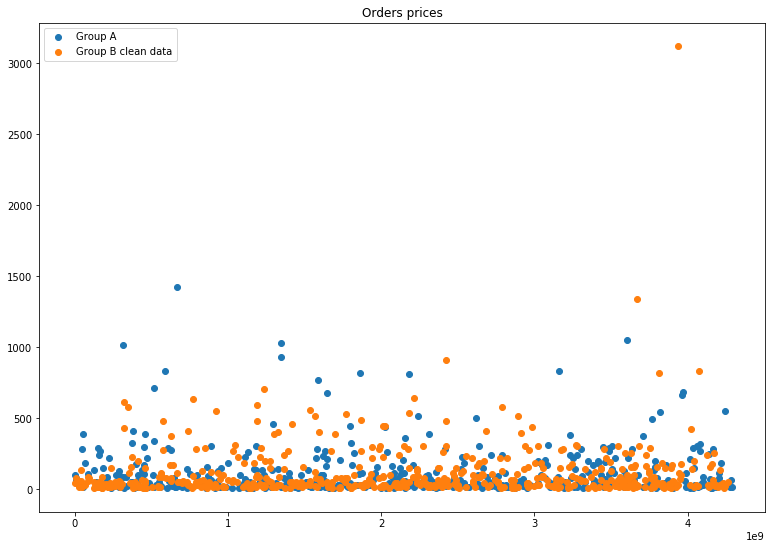

In [54]:
#creating a scatter plot for the orders prices for both groups with the clean data
plt.figure(figsize = (13, 9))
plt.scatter(orders_A['transactionId'], orders_A['revenue'], label = 'Group A')
plt.scatter(orders_B_clean['transactionId'], orders_B_clean['revenue'], label = 'Group B clean data')
plt.title('Orders prices')
plt.legend()
plt.show()

It looks like most of the orders are within the range of 0-500 USD.

**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [55]:
#calculating the 95th and 99th perecentile for the price of orders per user for group A
print(np.percentile(orders_A['revenue'], [95,99]))

[385.63  863.201]


For group A we can see that 95% of the users are spending less than 385 USD per order and not more than 1% of the users spend more than 863 USD.

In [56]:
#calculating the 95th and 99th perecentile for the price of orders per user for group B 
print(np.percentile(orders_B['revenue'], [95,99]))

[425.795 763.865]


For group B it's very close to group A, even if we keep the one extreme value order, 95% of the users spend up to ~420 USD and not more than 1% of the users spend more than 763 USD. 

We will apply what we learned about the anomalies of the two group to create a filtered data set.

In [57]:
#creating a list of abnormal users according to the 99 percentile that we calculated above
revenue_limA = np.percentile(orders_A['revenue'], 99) 
revenue_limB = np.percentile(orders_B['revenue'], 99)

orders_limA = np.percentile(orders_user_A['orders'], 99)
orders_limB = np.percentile(orders_user_B['orders'], 99)

usersWithManyOrders = pd.concat(
    [
        orders_user_A[orders_user_A['orders'] > orders_limA]['visitorId'],
        orders_user_B[orders_user_B['orders'] > orders_limB]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = pd.concat(
    [
        orders_A[orders_A['revenue'] > revenue_limA]['visitorId'],
        orders_B[orders_B['revenue'] > revenue_limB]['visitorId'],
    ],
    axis = 0,
)
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers_list = list(abnormalUsers)

In [58]:
orders_A_filtered = orders_A.query('visitorId not in @abnormalUsers_list')
orders_A_filtered.head()

,index,transactionId,visitorId,date,revenue,group
0,7,2626614568,78758296,2019-08-15,20.1,A
1,8,1576988021,295230930,2019-08-15,215.9,A
2,10,3649131742,879864040,2019-08-15,65.7,A
3,12,2809384911,3213223594,2019-08-15,115.4,A
4,14,3859315276,1565034404,2019-08-15,170.9,A


In [59]:
orders_B_filtered = orders_B.query('visitorId not in @abnormalUsers_list')
orders_B_filtered.head()

,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,3,3797467345,1196621759,2019-08-15,155.1,B
3,4,2282983706,2322279887,2019-08-15,40.5,B
4,5,182168103,935554773,2019-08-15,35.0,B


**Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

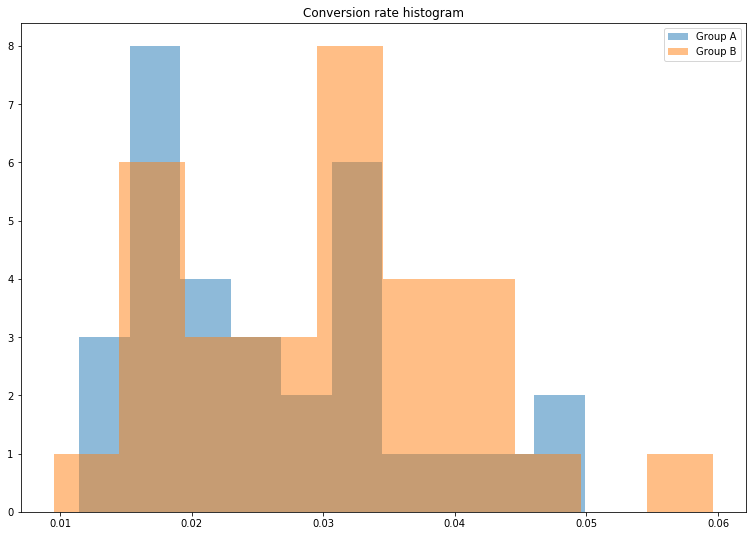

In [60]:
#looking at the conversion rates of both groups 
plt.figure(figsize = (13,9))
plt.hist(orders_visits_A['conversion'], alpha = 0.5, label = 'Group A')
plt.hist(orders_visits_B['conversion'], alpha = 0.5, label = 'Group B')
plt.title('Conversion rate histogram')
plt.legend()
plt.show()

In [61]:
#creating a function to find the statistical significance of the difference in conversion using the raw data
#we can use this function later on in our analysis
def s_significance(sample1,sample2,alpha=0.05):
    #checking if the samples are normaly distributed using the shapiro test
    #removing null values from the samples
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    s1, p1_norm=stats.shapiro(sample1)
    s2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both samples are normally distributed and we can continue to perform a t-test
        #for t-test we need to check if the variances are equal using the levene test
        s_lvn,p_lvn=stats.levene(sample1, sample2)
        if p_lvn<alpha:
           #variances are not equal
            stst,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            stat,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
    #samples are not normally distributed we need to perform mann-whitney test
        stat,p_value=stats.mannwhitneyu(sample1, sample2)
    print('P-value is: {}'.format(p_value))
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

I will use the above function to check the statistical signicifance between the conversion rate of the two groups using the raw data. 

H0: There is no statistically significant difference between the conversion rate of group A and group B, the samples are equal. 

H1: There is a statistically significant difference between conversion rate of group A ang group B.

In [62]:
#Use the function to check the statistical significance between the conversion rate of the two groups using raw data
s_significance(orders_visits_A['conversion'], orders_visits_B['conversion'])

P-value is: 0.09573715593918651
Fail to Reject H0


We fail to reject the null hypotheses, there is no significant difference between the conversion rate of groups A and B.

Defining the hypotheses:

H0: There is no statistically significant difference between the average order size of group A and group B, the samples are equal. 

H1: There is a statistically significant difference between average order size of group A ang group B.

In [63]:
#Use the function to check the statistical significance between the average order size of the two groups using raw data
s_significance(avg_chk_A['avg_check'], avg_chk_B['avg_check'])

P-value is: 0.4775457158686006
Fail to Reject H0


We fail to reject the null hypotheses, there is no significant difference between the average check of groups A and B.

**Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

In [64]:
#calculating the conversion rate for group B using the filtered data
#counting the number of orders grouped by date
orders_B_filtered_count = orders_B_filtered.groupby('date').agg({'transactionId':'count'}).reset_index()
#merging the filtered orders data with the visits
orders_visits_B_filtered = visits_B.merge(orders_B_filtered_count, on = 'date')
orders_visits_B_filtered.columns = ['date', 'group', 'visits', 'orders']
#calculating conversion
orders_visits_B_filtered['conversion'] = orders_visits_B_filtered['orders'] / orders_visits_B_filtered['visits']

In [65]:
#Doing the same for group A
#counting the number of orders grouped by date
orders_A_filtered_count = orders_A_filtered.groupby('date').agg({'transactionId':'count'}).reset_index()
#merging the filtered orders data with the visits
orders_visits_A_filtered = visits_A.merge(orders_A_filtered_count, on = 'date')
orders_visits_A_filtered.columns = ['date', 'group', 'visits', 'orders']
#calculating conversion
orders_visits_A_filtered['conversion'] = orders_visits_A_filtered['orders'] / orders_visits_A_filtered['visits']

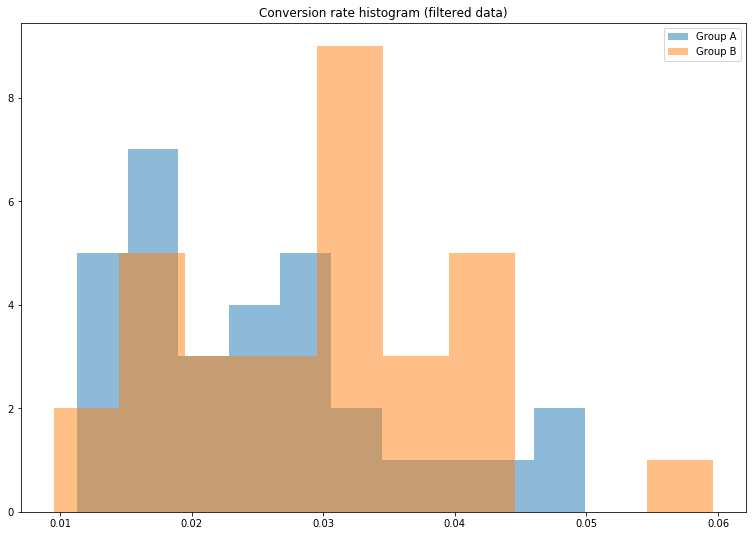

In [66]:
#looking at the conversion rates of both filtered groups 
plt.figure(figsize = (13,9))
plt.hist(orders_visits_A_filtered['conversion'], alpha = 0.5, label = 'Group A')
plt.hist(orders_visits_B_filtered['conversion'], alpha = 0.5, label = 'Group B')
plt.title('Conversion rate histogram (filtered data)')
plt.legend()
plt.show()

In [67]:
#calculating average conversion rate for group A - filtered
orders_visits_A_filtered['conversion'].mean()

0.024877867674384355

In [68]:
#calculating average conversion rate for group B - filtered
orders_visits_B_filtered['conversion'].mean()

0.029746174447601383

In [69]:
#calculating the differnce in average conversion rate between the group
((orders_visits_B_filtered['conversion'].mean()-orders_visits_A_filtered['conversion'].mean())/orders_visits_A_filtered['conversion'].mean())*100

19.56882654468698

Defining the hypotheses:

H0: There is no statistically significant difference between the conversion rate of group A and group B, the samples are equal. 

H1: There is a statistically significant difference between conversion rate of group A ang group B.

In [70]:
#Use the function to check the statistical significance between the conversion rate of the two groups using filtered data
s_significance(orders_visits_A_filtered['conversion'], orders_visits_B_filtered['conversion'])

P-value is: 0.022044902794960863
Reject H0


When using the filtered data with the anomalies of users who purchased more than twice a month the conversion rate is significantly different between the groups in favor to group B with almost 20% increase in average conversion rate.

In [71]:
#looking at the cumulative revenue for both groups with filtered data
revenue_A_filtered = orders_A_filtered.groupby('date').agg({'revenue':'sum'}).reset_index()
revenue_A_filtered['cum_rev'] = revenue_A_filtered['revenue'].cumsum()
revenue_B_filtered = orders_B_filtered.groupby('date').agg({'revenue':'sum'}).reset_index()
revenue_B_filtered['cum_rev'] = revenue_B_filtered['revenue'].cumsum()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

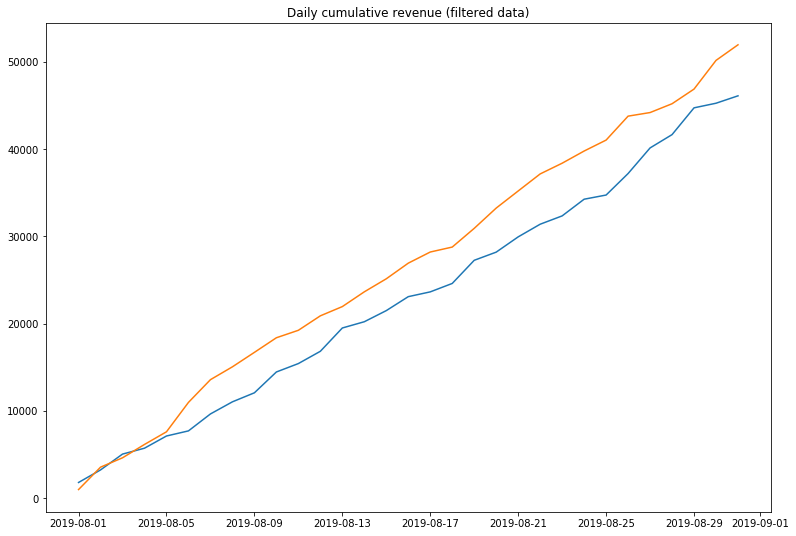

In [72]:
#plotting the cumulative revenue 
plt.figure(figsize=(13,9))
plt.plot(revenue_A_filtered['date'], revenue_A_filtered['cum_rev'], label = 'Group A filtered')
plt.plot(revenue_B_filtered['date'], revenue_B_filtered['cum_rev'], label = 'Group B filtered')
plt.title('Daily cumulative revenue (filtered data)')
plt.show()

Looking at the revenue graph it looks like from the 5th day of the test, group B's revenue increased and continued to be higher than group B, probably due to the higher conversion rate. 

**Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

In [73]:
#calculating average check for Group B with the filtered data
avg_chk_B_filtered = orders_B_filtered.groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
avg_chk_B_filtered['avg_check'] = avg_chk_B_filtered['revenue'] / avg_chk_B_filtered['transactionId']

In [74]:
#doing the same for group A
avg_chk_A_filtered = orders_A_filtered.groupby('date').agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
avg_chk_A_filtered['avg_check'] = avg_chk_A_filtered['revenue'] / avg_chk_A_filtered['transactionId']

Defining the hypotheses:

H0: There is no statistically significant difference between the average order size of group A and group B, the samples are equal. 

H1: There is a statistically significant difference between average order size of group A ang group B.

In [75]:
#Use the function to check the statistical significance between the average order size of the two groups using filtered data
s_significance(avg_chk_A_filtered['avg_check'], avg_chk_B_filtered['avg_check'])

P-value is: 0.5136004701322858
Fail to Reject H0


Even with the filtered data we can't reject the null hypothese, the avergae check of both groups is not significantly different. It makes sense that the average check will be similar after we removed all the high value orders and kept the same range of orders (up to ~800).

**Make a decision based on the test results.**

The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

The test has been running for 1 month, looking at the results I think we can stop the test and declare that the leading group is Group B.
After removing anomalies in both groups we can see that group B has a higher conversion rate and eventhough the average check is the same our total revenue will be higher for group B assuming the conversion is indeed higher.